### Старая структура

Структура имела дефект в сущности sup_to_prod. По-сути она являлась бесползной, так как не давала информации сколько товаров за день продал каждый постащик, ввиду остуствия привязки каждого товара к конкретному поставщику.

**product_categories**  
|- id  
|- product_category  

**products**  
|- id  
|- name  
|- product_category_id  
|- country_from  

**sup_to_prod**  
|- id  
|- product_id  
|- supplier_id  

**sell**  
|- id  
|- product_id  
|- quantity  
|- sell_date  

**suppliers**  
|- id  
|- supplier_name  
|- address  

### Новая структура

**product_categories**  
|- id  
|- product_category 

**products**  
|- id  
|- name  
|- product_category_id  
|- country_from 

**sell**  
|- id  
|- product_id  
|- <span style="color: red">supplier_id</span>  
|- quantity  
|- sell_date  

**suppliers**  
|- id  
|- supplier_name  
|- address 

In [331]:
import pandas as pd
from random import randint
from random import sample
from random import uniform
import datetime
import numpy as np

In [332]:
# Считываем сущность product_category
categories = pd.read_excel('NewData.xlsx', sheet_name='sr.1', index_col='id')
categories

,product_category
id,
1,Телефон
2,Монитор
3,Мышка
4,Клавиатура
5,Ноутбук
6,Игровая приставка
7,Наушники


In [333]:
# Считываем сущность products
products = pd.read_excel('NewData.xlsx', sheet_name='sr.2', index_col='id')
print(products.shape)
products.head()

(157, 3)


,name,product_category_id,country_from
id,,,
1,Realme 9 Pro 8/128 Gb,1,Китай
2,Redmi Note 10 Pro 8/128 Gb,1,Китай
3,Poco X3 Pro 8/256 Gb,1,Китай
4,Redmi Note 11 Pro 5G 8/128 GB,1,Китай
5,Honor 50 8/128 Gb,1,Китай


In [334]:
# Считываем сущность sells - она пустая
sells = pd.read_excel('NewData.xlsx', sheet_name='sr.3', index_col='id')
sells

,product_id,supplier_id,quantity,sell_date
id,,,,


In [335]:
# Считываем сущность suppliers 
suppliers = pd.read_excel('NewData.xlsx', sheet_name='sr.4', index_col='id')
suppliers

,supplier_name,address
id,,
1,Поставщик_1,Индия
2,Поставщик_2,США
3,Поставщик_3,Корея
4,Поставщик_4,Тайвань
5,Поставщик_5,Нидерланды
6,Поставщик_6,Швейцария
7,Поставщик_7,Япония
8,Поставщик_8,Англия
9,Поставщик_9,Турция


In [336]:
# Считываем сущность sup_to_prod - она пустая
# sup_to_prod = pd.read_excel('Data.xlsx', sheet_name='sr.5', index_col='id')
# sup_to_prod

# Создаем рабочую таблицу sup_to_prod
sup_to_prod = pd.DataFrame(columns=['supplier_id', 'product_id'])
sup_to_prod

,supplier_id,product_id


In [337]:
# Заполняем sup_to_prod
# Пусть каждый Поставщик имеет в своем каталоге от 30 до 45 наименований товаров
for sup_id in suppliers['supplier_name'].index:
    sup_products = sample(products.index.to_list(), randint(30, 45))
    for prod_id in sup_products:
        sup_to_prod.loc[len(sup_to_prod.index)] = [sup_id, prod_id]

In [338]:
sup_to_prod.loc[25:40]

,supplier_id,product_id
25,1,92
26,1,24
27,1,59
28,1,139
29,1,52
30,1,156
31,1,118
32,1,151
33,1,55
34,1,106


In [339]:
# задаем праздничные даты за 2019 год
important_dates_list_first = ['2019-01-01', '2019-02-23', '2019-03-08', '2019-05-09', '2019-06-12']
important_dates_list_first = list(map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'), important_dates_list_first))

# задаем праздничные даты за 2019, 2020, 2021, 2022 годы
important_dates_list = []
for i in range(4):
    for day in important_dates_list_first:
        important_dates_list.append(day + datetime.timedelta(days=365*i))

# создаем датафрейм и задаем для каждой праздничной даты двух недельный период акций
important_dates = pd.DataFrame(important_dates_list, columns=['Date'])[:16]
important_dates['StartDate'] = important_dates['Date'].apply(lambda x: x - datetime.timedelta(days=7))
important_dates['FinishDate'] = important_dates['Date'].apply(lambda x: x + datetime.timedelta(days=7))

# вытаскиваем начало и конец временного среза
start_day = important_dates.loc[0, 'StartDate']
finish_day = important_dates.loc[important_dates.index[-1], 'FinishDate']

# считаем количество дней во временном срезе и задаем все дни
all_time = (finish_day - start_day).days
all_days = [start_day + datetime.timedelta(days=day_num) for day_num in range(all_time+1)]

print(all_time)
important_dates

1109


,Date,StartDate,FinishDate
0,2019-01-01,2018-12-25,2019-01-08
1,2019-02-23,2019-02-16,2019-03-02
2,2019-03-08,2019-03-01,2019-03-15
3,2019-05-09,2019-05-02,2019-05-16
4,2019-06-12,2019-06-05,2019-06-19
5,2020-01-01,2019-12-25,2020-01-08
6,2020-02-23,2020-02-16,2020-03-01
7,2020-03-07,2020-02-29,2020-03-14
8,2020-05-08,2020-05-01,2020-05-15
9,2020-06-11,2020-06-04,2020-06-18


In [340]:
# создаем вспомагательную таблицу quality
# сзадаем каждому товару общее количество продаж
quality =pd.DataFrame(
    {
        'product_id': products.index,
        'quality': [randint(10000, 200000) for i in products.index] # количество продаж от 10 тыс. до 200 тыс.
    }
)

# задаем среднее количество продаж за день для каждого товара
quality['mean_day_quality'] = quality['quality'].apply(lambda x: x // all_time)

# задаем мощность товара, т.е. восколько раз максимально увеличатся продажи в праздничные дни
quality['power'] = [uniform(1.5, 3) for i in products.index]

quality.head()


,product_id,quality,mean_day_quality,power
0,1,147699,133,2.887921
1,2,32265,29,2.299857
2,3,199808,180,2.953586
3,4,64076,57,2.141911
4,5,85892,77,2.001602


In [341]:
# Добавляем технические колонки tmp и заполняем 1, чтобы произвести cross join
sup_to_prod['tmp'] = 1
all_days_df = pd.DataFrame(all_days, columns=['Date'])
all_days_df['tmp'] = 1

# Cross join всех записей из sup_to_prod для всех дат
buf_sells = pd.merge(sup_to_prod, all_days_df, on=['tmp'])
buf_sells = buf_sells.drop('tmp', axis=1)

# Заполняем таблицу sells
sells['supplier_id'] = buf_sells['supplier_id']
sells['product_id'] = buf_sells['product_id']
sells['sell_date'] = buf_sells['Date']

In [342]:
sells.head()

,product_id,supplier_id,quantity,sell_date
id,,,,
0,44,1,NaN,2018-12-25
1,44,1,NaN,2018-12-26
2,44,1,NaN,2018-12-27
3,44,1,NaN,2018-12-28
4,44,1,NaN,2018-12-29


In [343]:
# заполняем знаковые даты

for prod_id in quality.product_id:
    for imp_day in important_dates.index:
        # ищем праздничные периоды для товара в таблице sells
        sdt = important_dates.loc[imp_day].StartDate
        fdt = important_dates.loc[imp_day].FinishDate
        imp_prd = sells.loc[(sells.sell_date >= sdt) & (sells.sell_date <= fdt) & (sells.product_id == prod_id)]
        imp_prd_ind = imp_prd.index
        imp_prd_nsup = imp_prd.supplier_id.nunique()

        # достаем из нормального распредления продажи для праздничных дней
        size = len(imp_prd_ind)
        norm_value = quality.loc[quality.product_id == prod_id, 'mean_day_quality']
        norm_value = norm_value / imp_prd_nsup
        mu = norm_value * quality.loc[quality.product_id == prod_id, 'power'] # увеличенные продажи
        sigma = mu - norm_value # разброс до значений обыкновенного дня
        sells.loc[imp_prd_ind, 'quantity'] = [int(abs(value)) for value in np.random.normal(loc=mu, scale=sigma, size=size)]

In [344]:
# заполняем остальные данные

for prod_id in quality.product_id:
    # находим обыкновенные дни

    smp_day = sells.loc[(sells.quantity.isna()) & (sells.product_id==prod_id)]
    smp_day_ind = smp_day.index
    smp_day_nsup = smp_day.supplier_id.nunique()

    # достаем из нормального распредления продажи для обыкновенных дней
    size = len(smp_day_ind)
    mu = quality.loc[quality.product_id == prod_id, 'mean_day_quality'] # уровень прожаж обыкновенного дня
    mu = mu / smp_day_nsup
    sigma = mu * 0.2 # разброс в 20%
    sells.loc[smp_day_ind, 'quantity'] = [int(abs(value)) for value in np.random.normal(loc=mu, scale=sigma, size=size)]

In [345]:
sells.head()

,product_id,supplier_id,quantity,sell_date
id,,,,
0,44,1,19,2018-12-25
1,44,1,37,2018-12-26
2,44,1,29,2018-12-27
3,44,1,36,2018-12-28
4,44,1,29,2018-12-29


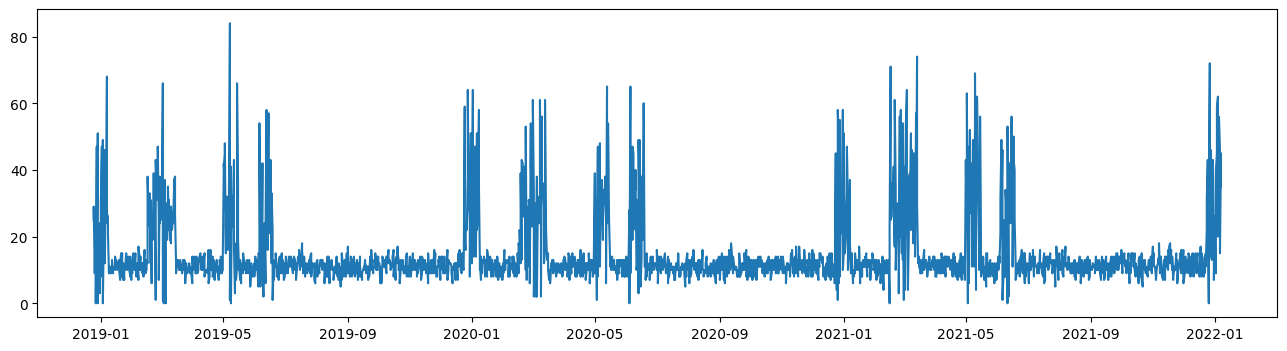

In [346]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
prd_id = 52
plt.plot(sells[sells.product_id==prd_id].sort_values('sell_date').sell_date, sells[sells.product_id==prd_id].sort_values('sell_date').quantity)
plt.show()

In [347]:
# записываем данные в файл DataFull.xlsx

writer = pd.ExcelWriter('NewDataFull.xlsx', engine='xlsxwriter')

categories.to_excel(writer, sheet_name='sr.1')
products.to_excel(writer, sheet_name='sr.2')
sells.to_excel(writer, sheet_name='sr.3')
suppliers.to_excel(writer, sheet_name='sr.4')
sup_to_prod.to_excel(writer, sheet_name='sr.5')

writer.save()

/var/folders/7g/1dqbz5hx5994z2r91kw1_k2m0000gn/T/ipykernel_64847/3297861658.py:11: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
